In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
CU = pd.read_excel(r'D:/MDT/南通/运营商数据2.xlsx', sheet_name=0)
CT = pd.read_excel(r'D:/MDT/南通/运营商数据2.xlsx', sheet_name=1)
CM_month = pd.read_excel(r'D:/MDT/南通/运营商数据2.xlsx', sheet_name=2)
CM_year = pd.read_excel(r'D:/MDT/南通/运营商数据2.xlsx', sheet_name=3)

Wirte Functions

In [9]:
def draw(data,county,provider):
    male = data.loc[(data.性别 == '男')&(data.区县 == county)].groupby('年龄段',as_index=False).agg('sum')
    female = data.loc[(data.性别 == '女')&(data.区县 == county)].groupby('年龄段',as_index=False).agg('sum')
    male=male[~male['年龄段'].isin([-1])]
    male=male[~male['年龄段'].isin(['未知'])]
    female=female[~female['年龄段'].isin([-1])]
    female=female[~female['年龄段'].isin(['未知'])]
    female['人口'] = female['人口'] * -1
    df = pd.merge(female,male,on=['年龄段'])
    
    plt.figure(figsize=(8,5))
    bar_plot = sns.barplot(y = '年龄段', x = "人口_x", color = "red", data = df)
    bar_plot = sns.barplot(y = '年龄段', x = "人口_y", color = "blue", data = df)
    # sns is seaborn alias
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    bar_plot.set(xlabel="人口数量", ylabel="年龄层", title = provider + county + "年龄结构金字塔")
    return plt.show()

def draw2(data,county,month,provider):
    male = data.loc[(data.性别 == '男')&(data.区县 == county)&(data.月份 == month)].groupby(['年龄段'],as_index=False).agg('sum')
    female = data.loc[(data.性别 == '女')&(data.区县 == county)&(data.月份 == month)].groupby(['年龄段'],as_index=False).agg('sum')
    male=male[~male['年龄段'].isin([-1])]
    male=male[~male['年龄段'].isin(['未知'])]
    female=female[~female['年龄段'].isin([-1])]
    female=female[~female['年龄段'].isin(['未知'])]
    female['人口'] = female['人口'] * -1
    df = pd.merge(female,male,on=['年龄段','月份'])
    order_of_bars = df.年龄段.unique()[::1]
    
    plt.figure(figsize=(8,5))
    bar_plot = sns.barplot(y = '年龄段', x = "人口_x", color = "red", order = order_of_bars,data = df)
    bar_plot = sns.barplot(y = '年龄段', x = "人口_y", color = "blue", order = order_of_bars,data = df)
    # sns is seaborn alias
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    bar_plot.set(xlabel="人口数量", ylabel="年龄层", title = provider + str(month) + county + "年龄结构金字塔")
    return plt.show()
#不分区
def drawALL(data,provider):
    male = data.loc[(data.性别 == '男')].groupby(['年龄段'],as_index=False).agg('sum')
    female = data.loc[(data.性别 == '女')].groupby(['年龄段'],as_index=False).agg('sum')
    male=male[~male['年龄段'].isin([-1])]
    male=male[~male['年龄段'].isin(['未知'])]
    female=female[~female['年龄段'].isin([-1])]
    female=female[~female['年龄段'].isin(['未知'])]
    female['人口'] = female['人口'] * -1
    df = pd.merge(female,male,on=['年龄段','月份'])
    order_of_bars = df.年龄段.unique()[::1]
    
    plt.figure(figsize=(8,5))
    bar_plot = sns.barplot(y = '年龄段', x = "人口_x", color = "red", order = order_of_bars,data = df)
    bar_plot = sns.barplot(y = '年龄段', x = "人口_y", color = "blue", order = order_of_bars,data = df)
    # sns is seaborn alias
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    bar_plot.set(xlabel="人口数量", ylabel="年龄层", title = provider + "全区年龄结构金字塔")
    return plt.show()

Visualizing 联通分区百岁图

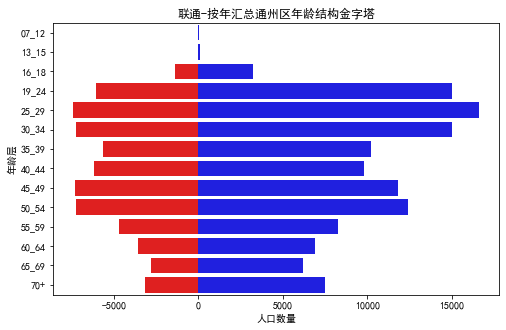

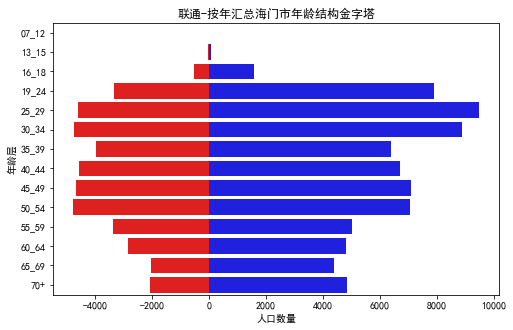

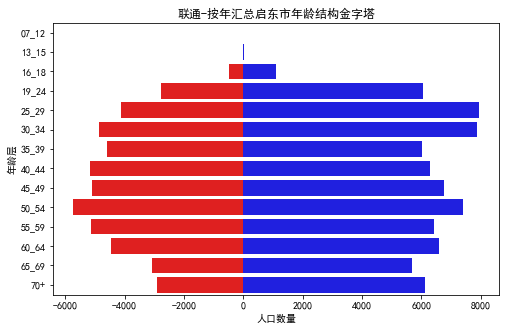

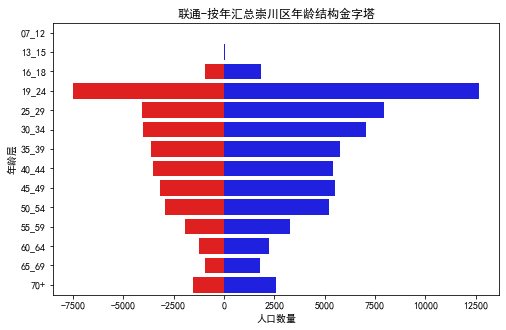

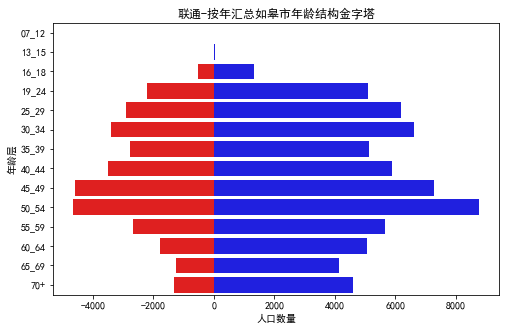

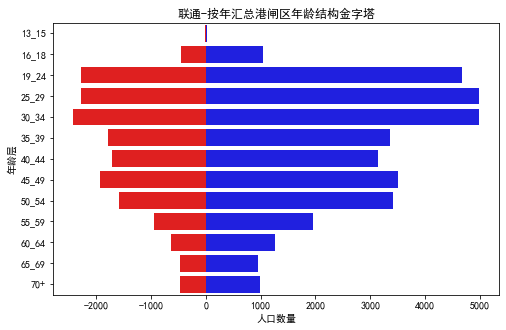

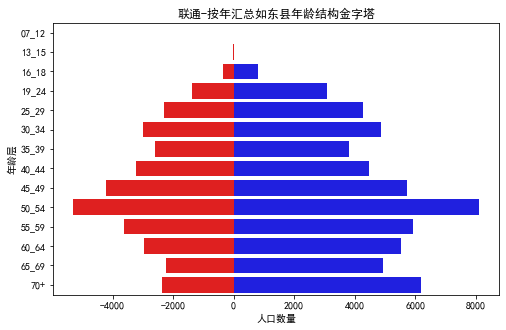

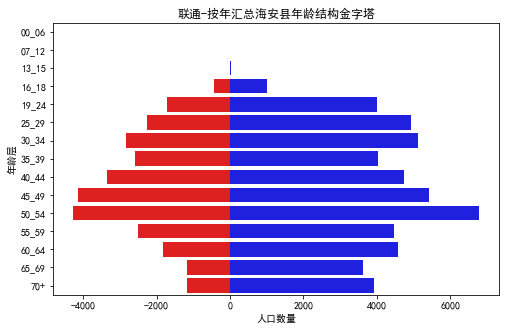

In [4]:
CUcounties = list(CU['区县'].unique())
for i in CUcounties:
    a = draw(CU,i,'联通-按年汇总')

Visualizing 电信分区按月百岁图

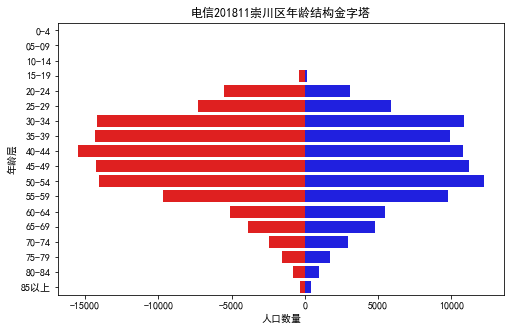

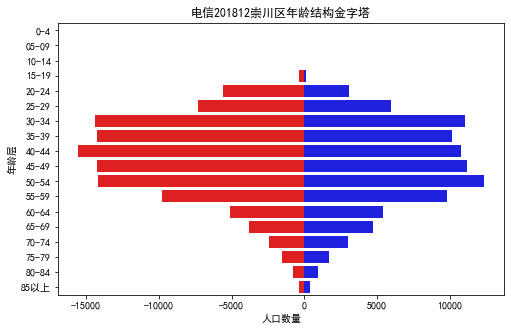

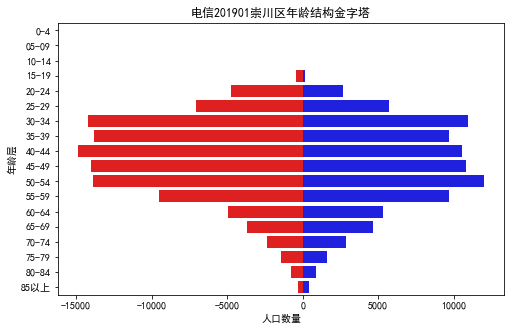

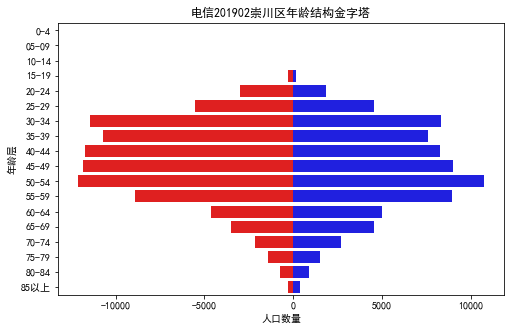

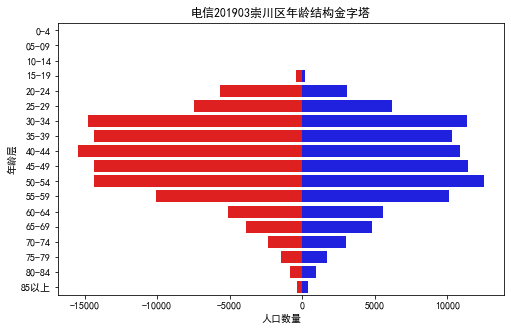

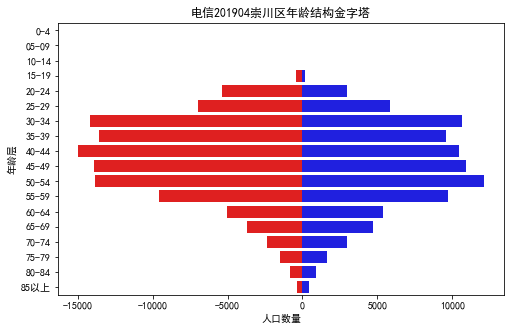

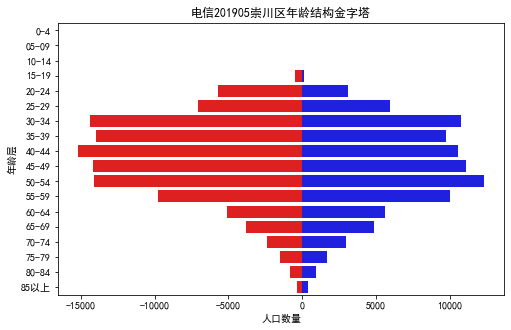

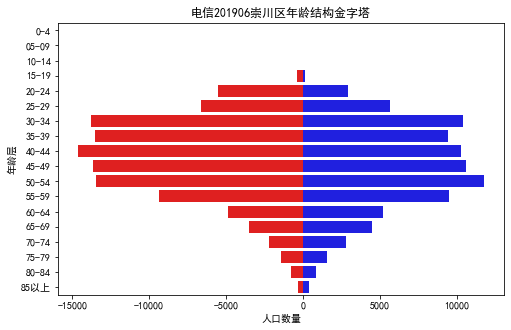

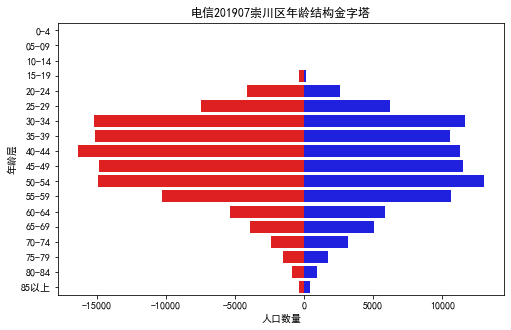

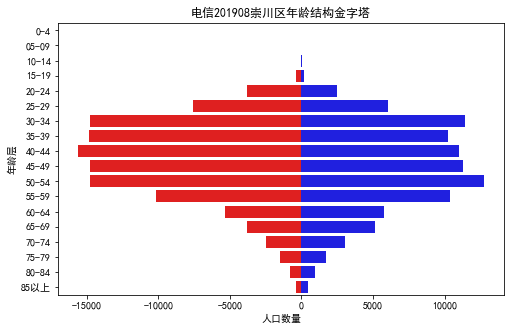

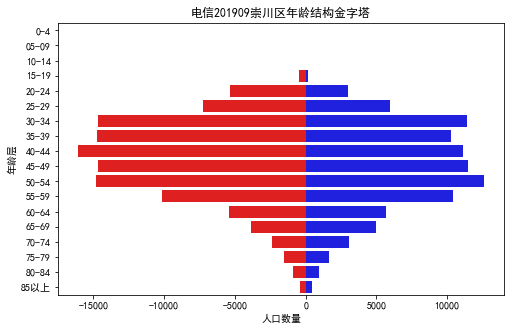

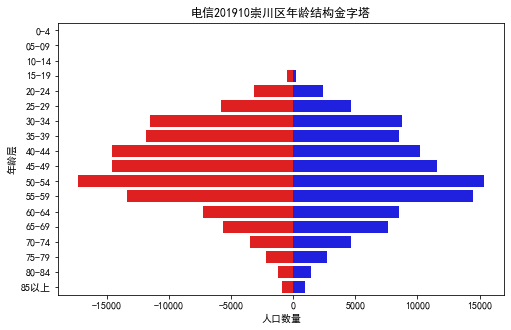

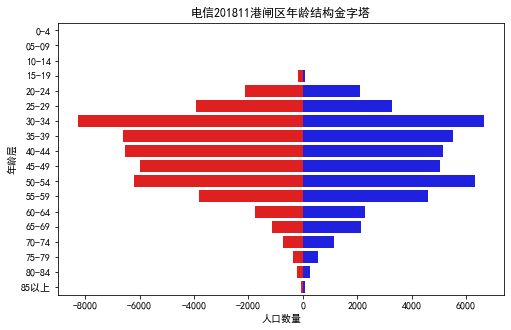

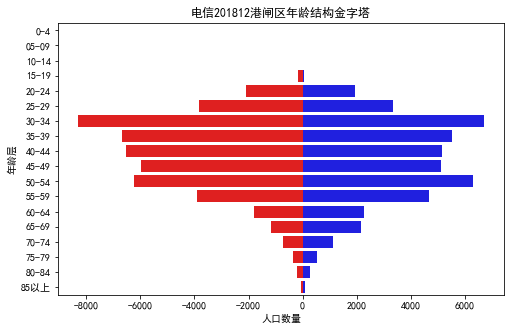

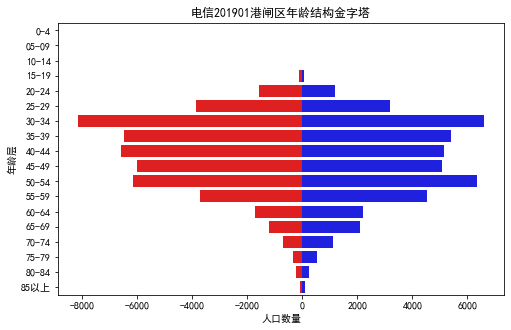

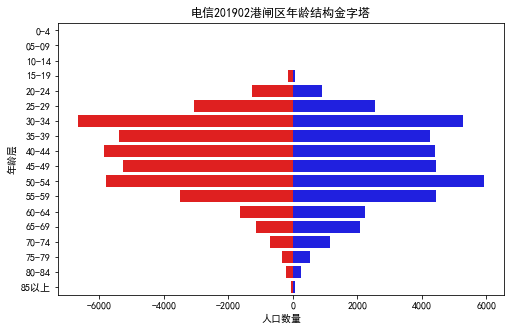

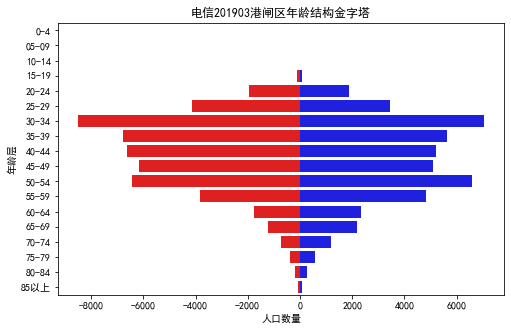

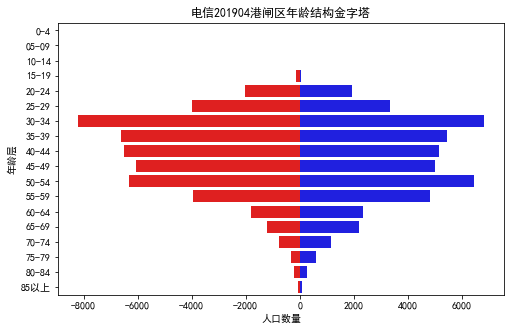

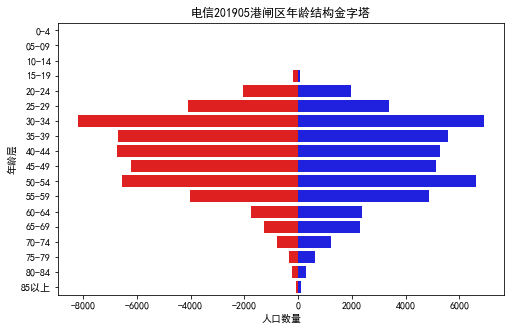

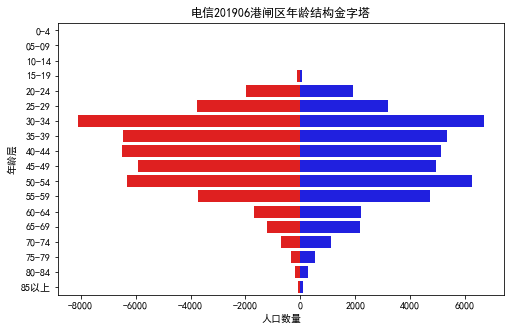

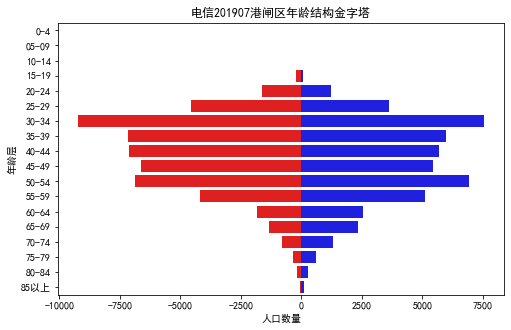

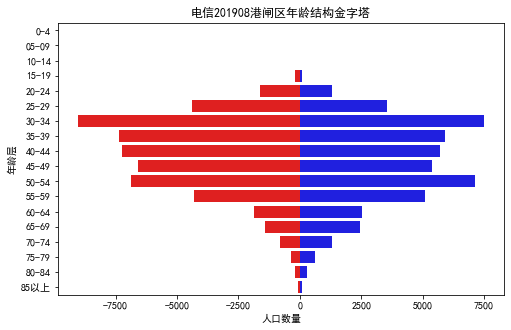

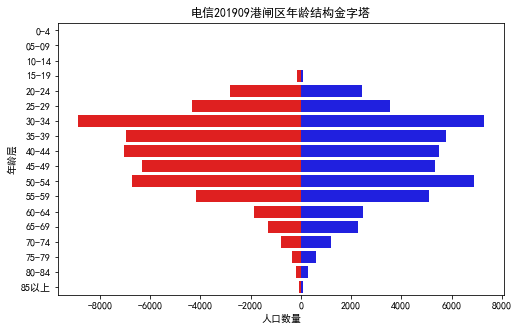

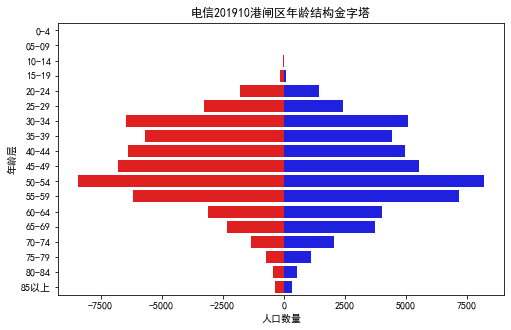

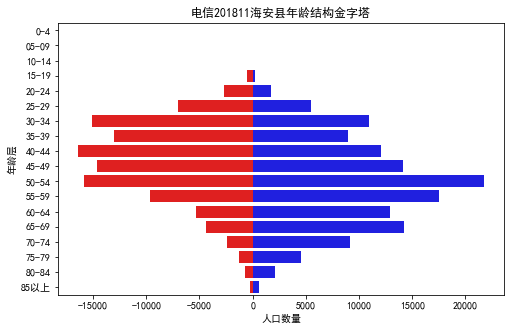

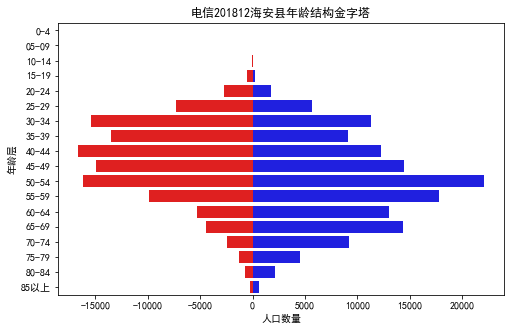

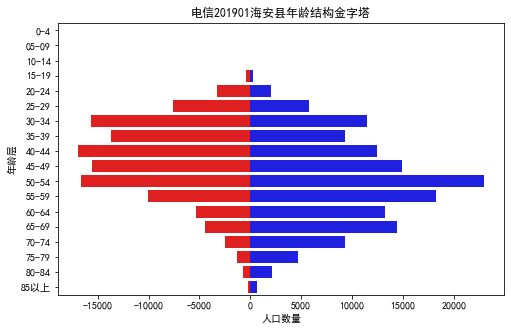

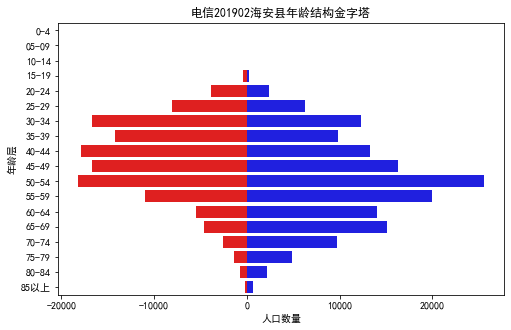

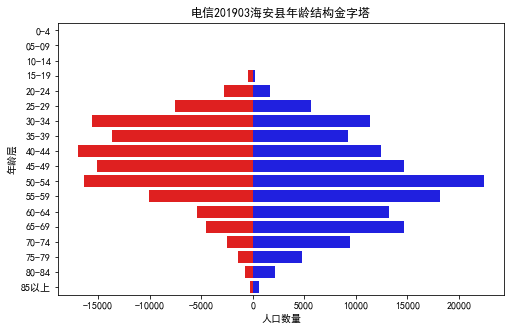

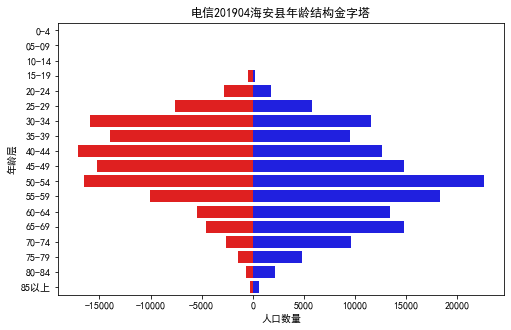

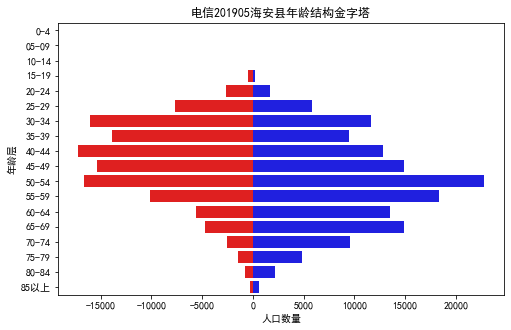

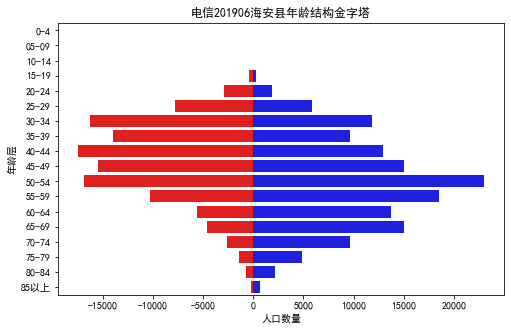

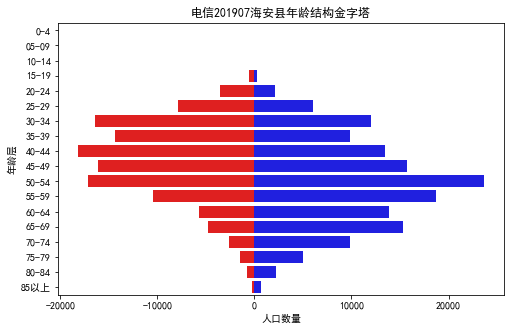

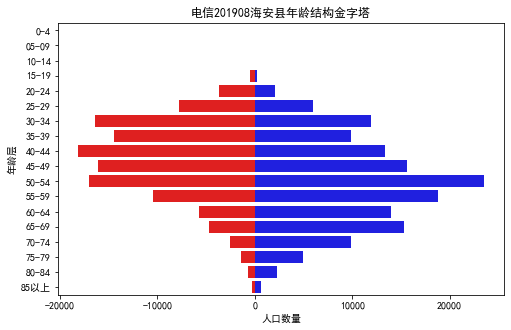

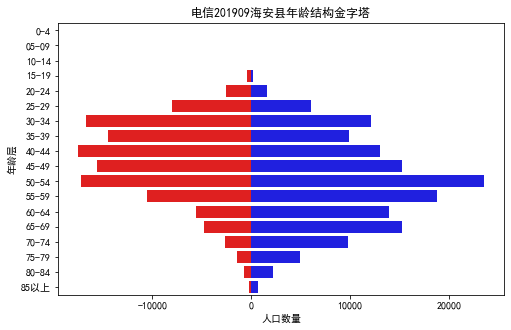

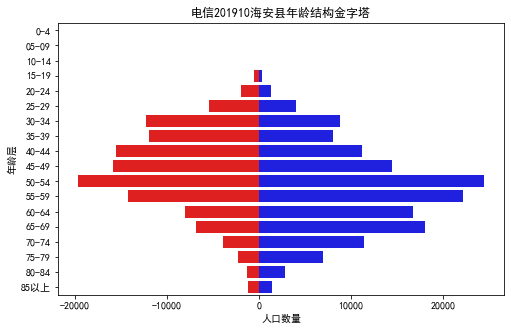

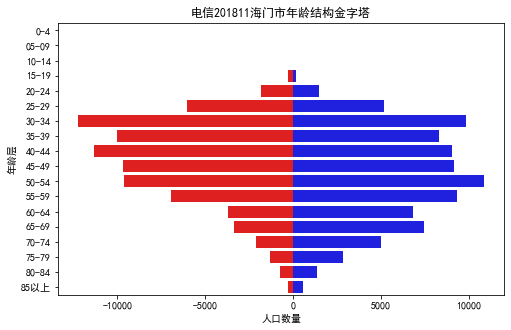

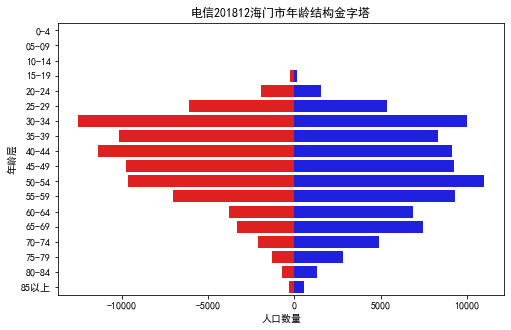

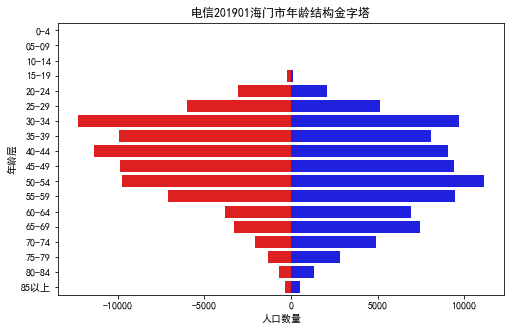

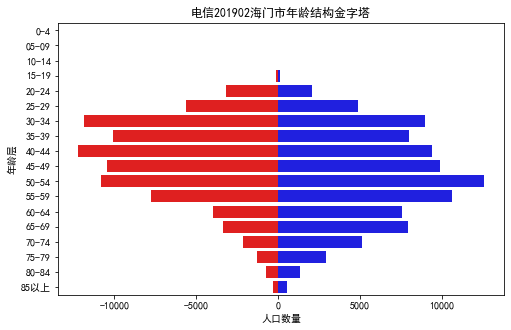

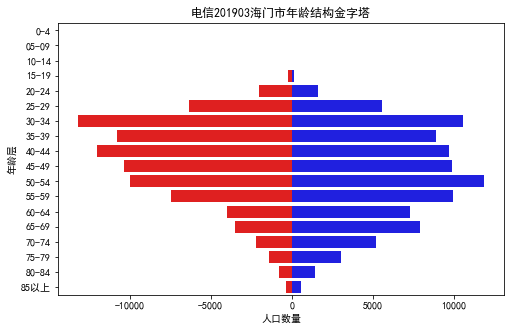

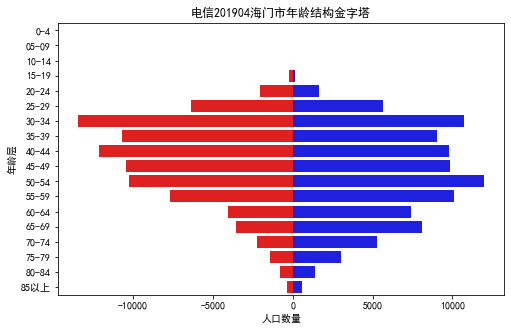

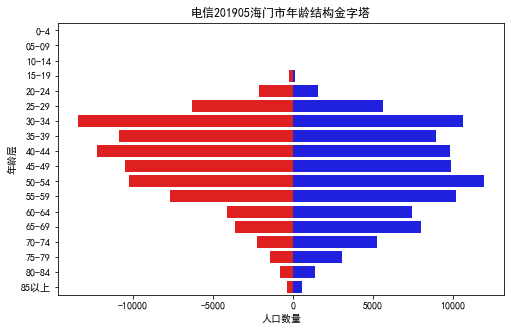

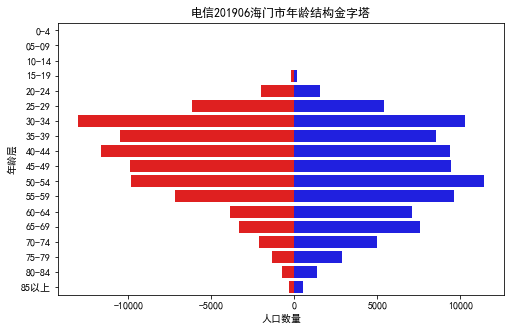

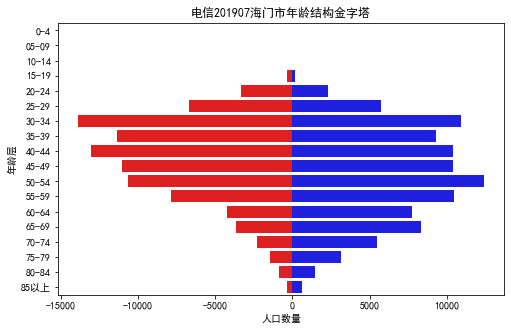

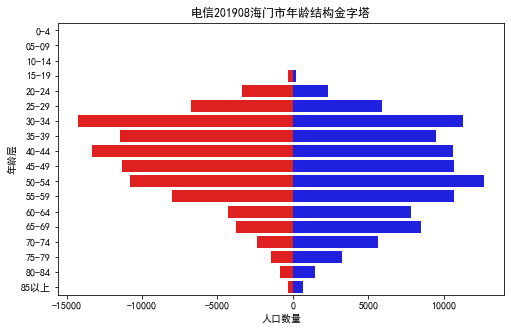

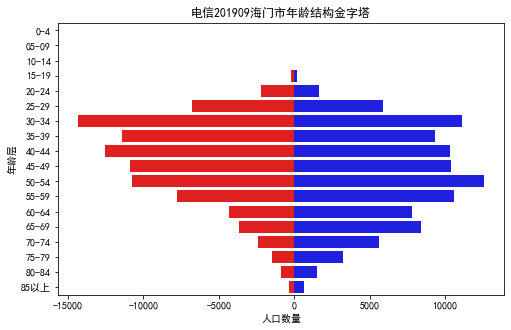

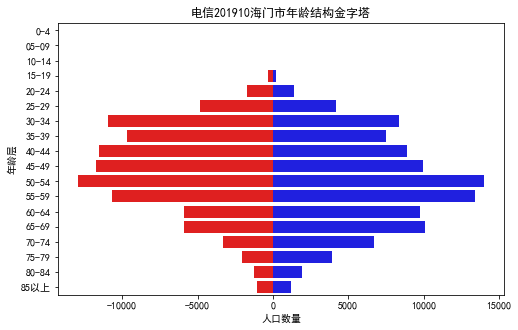

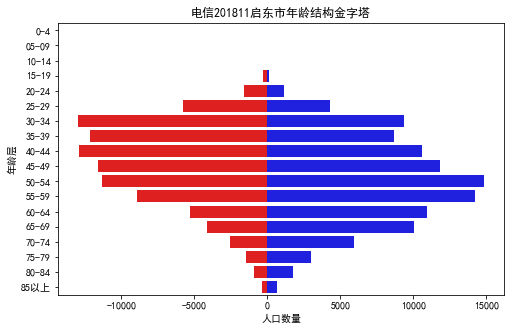

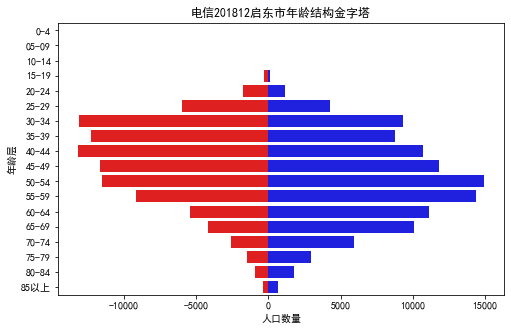

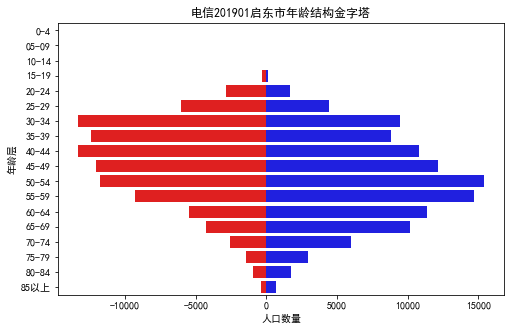

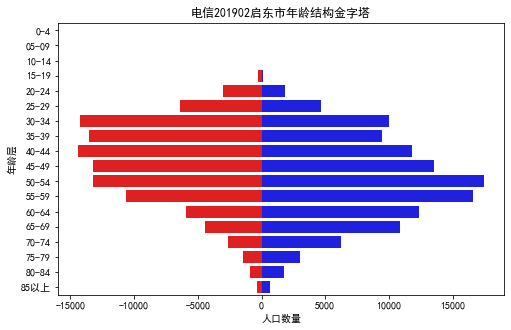

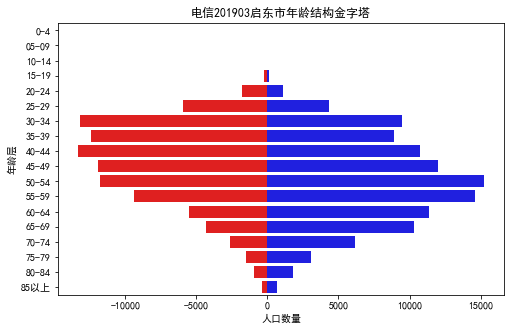

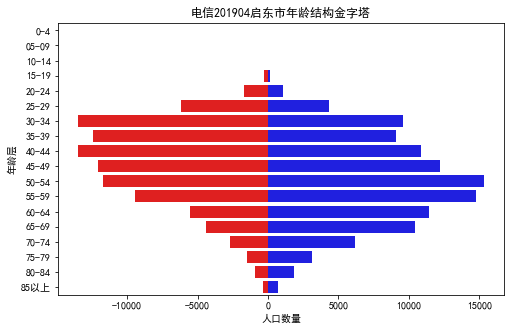

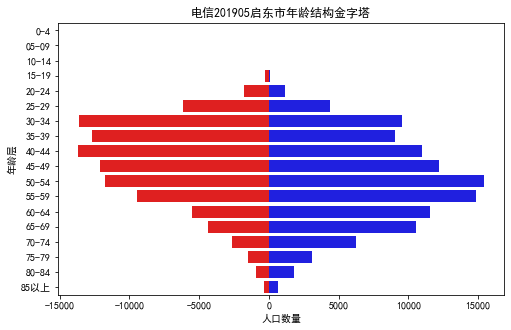

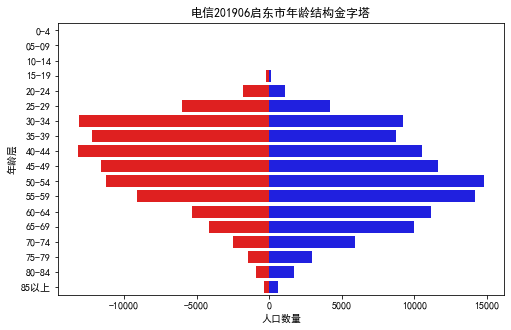

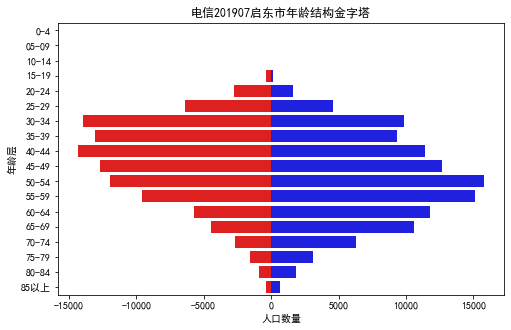

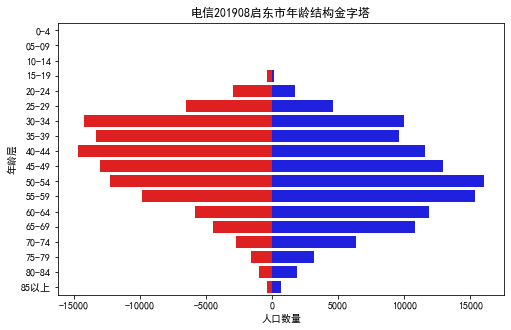

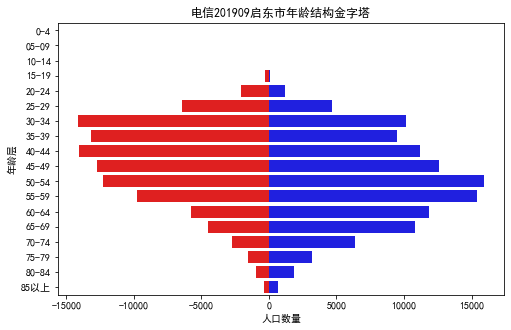

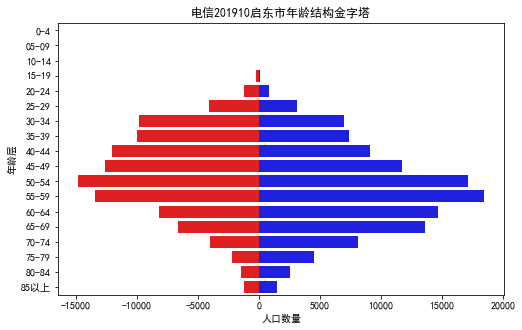

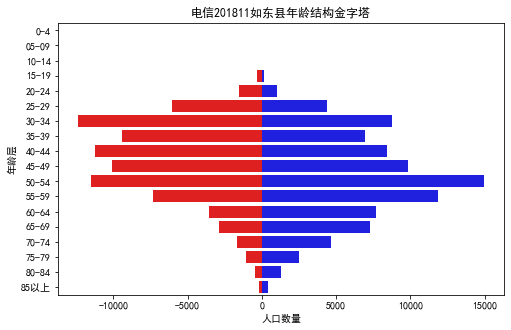

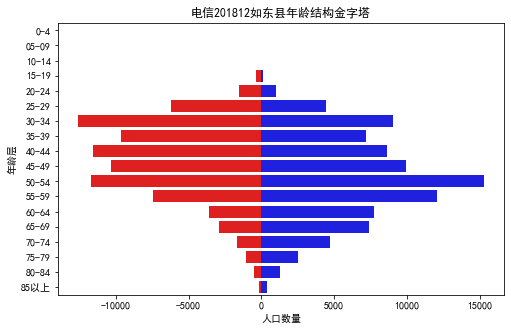

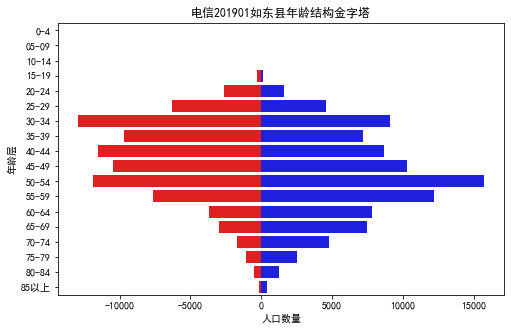

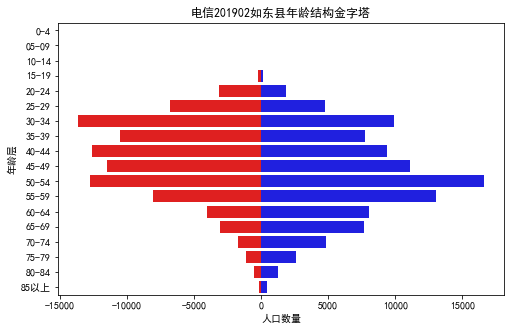

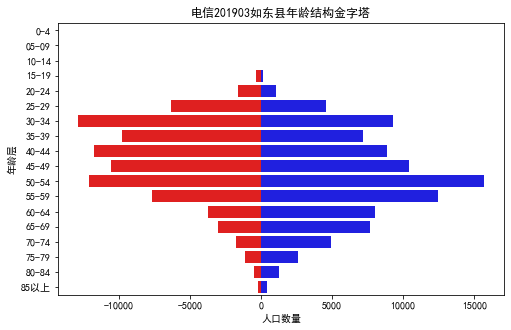

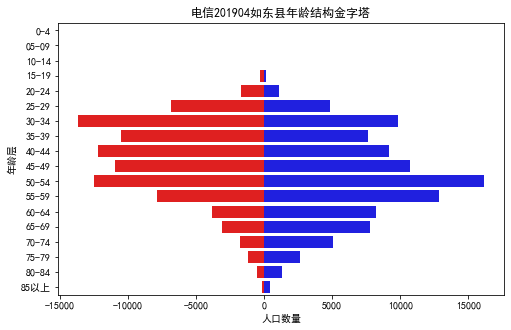

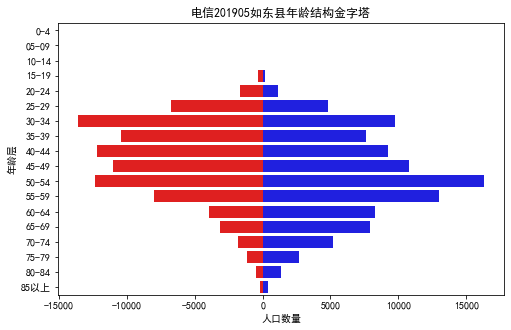

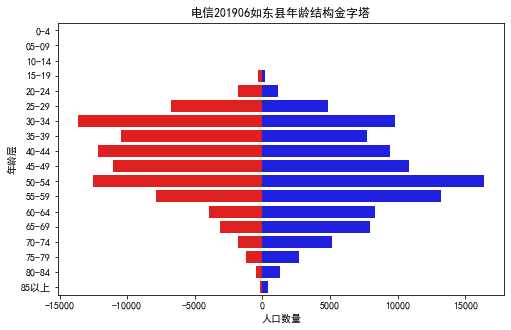

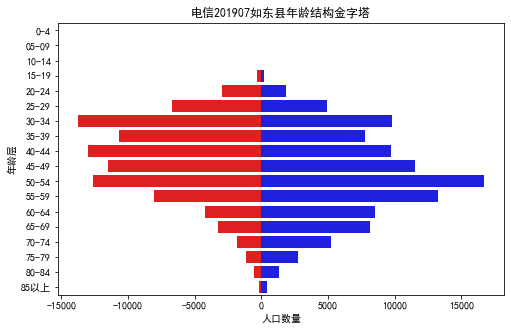

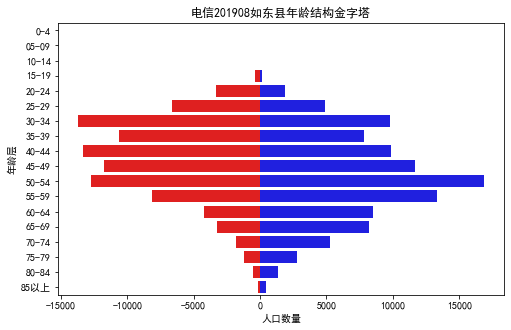

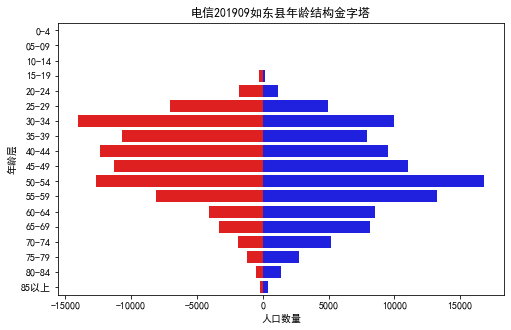

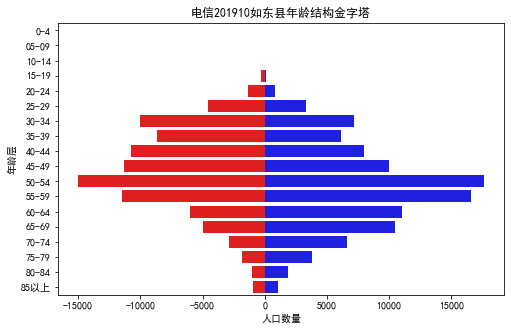

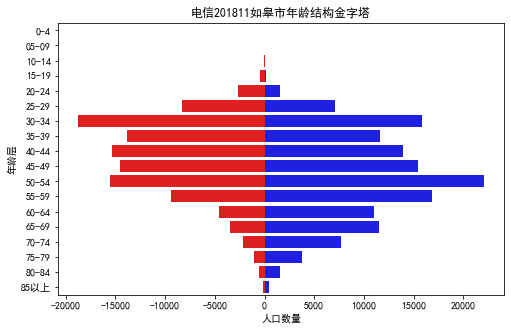

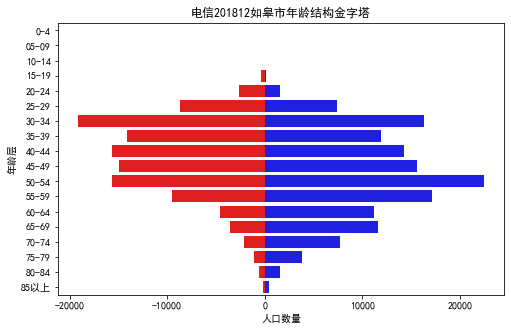

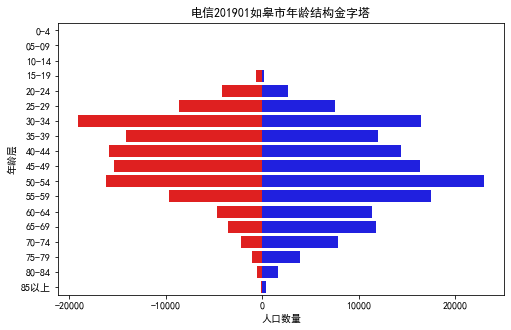

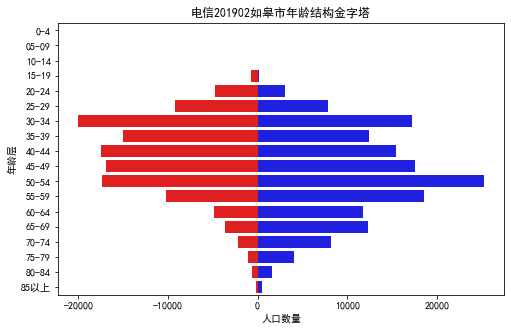

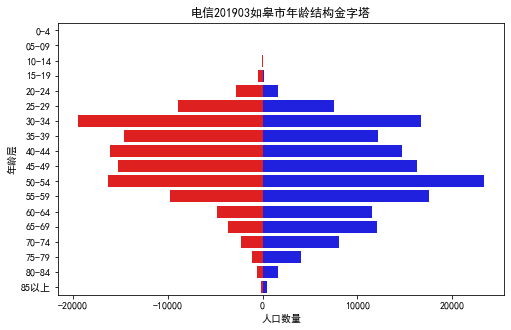

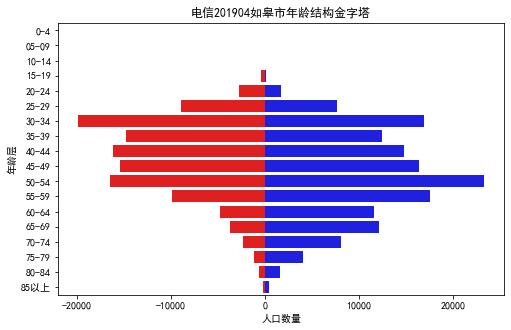

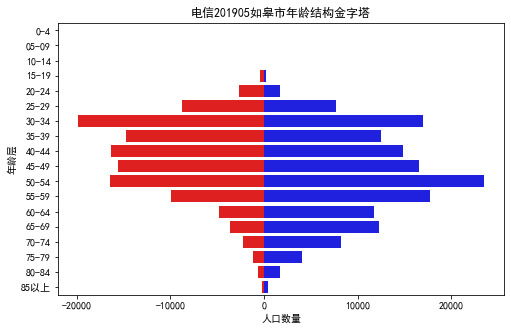

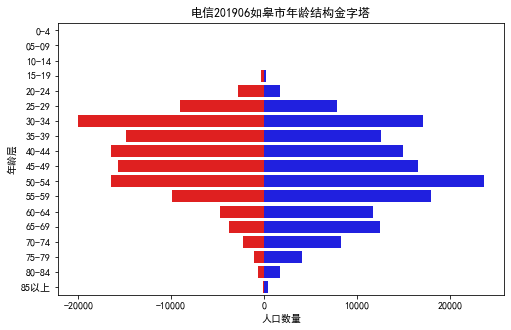

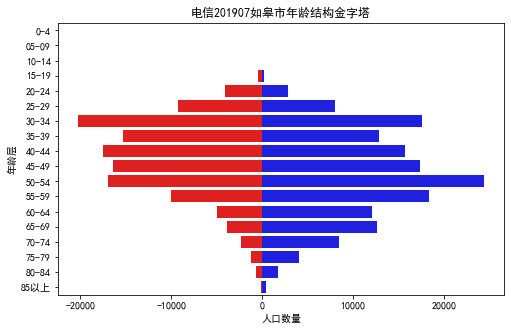

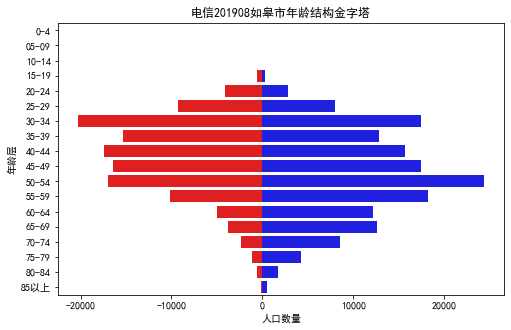

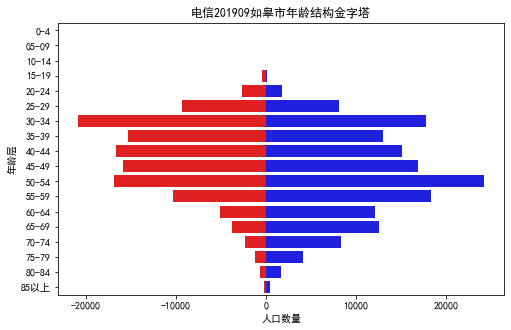

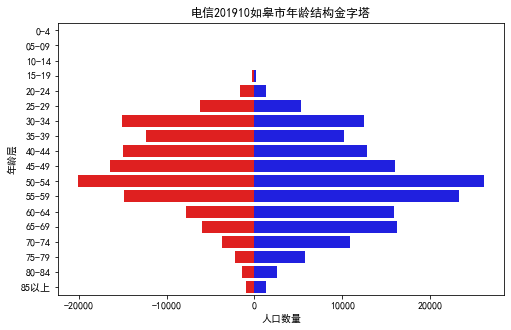

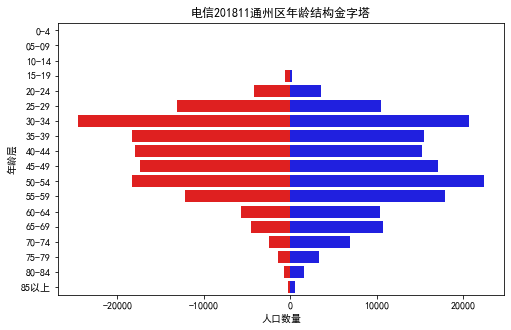

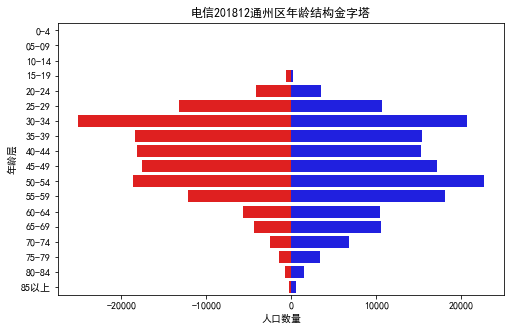

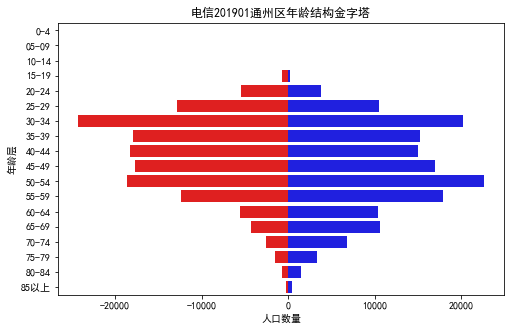

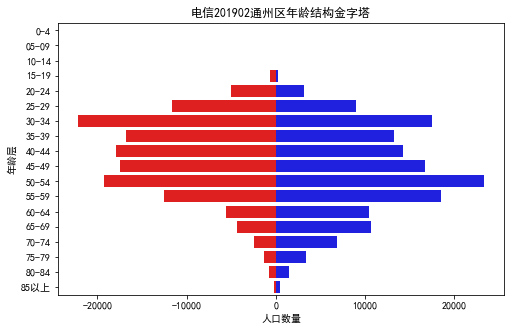

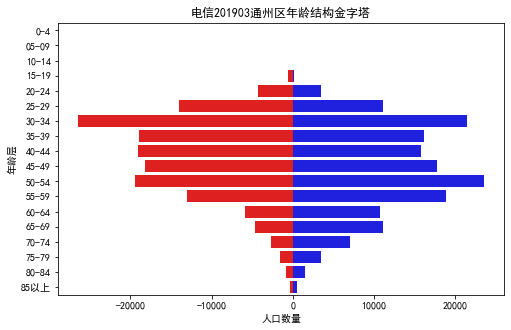

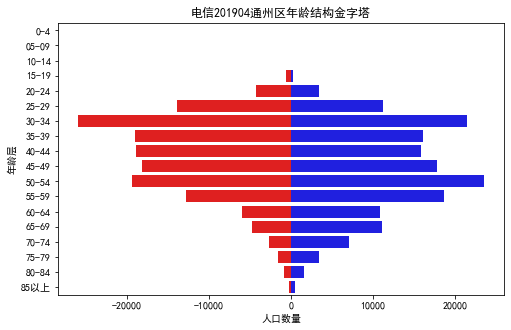

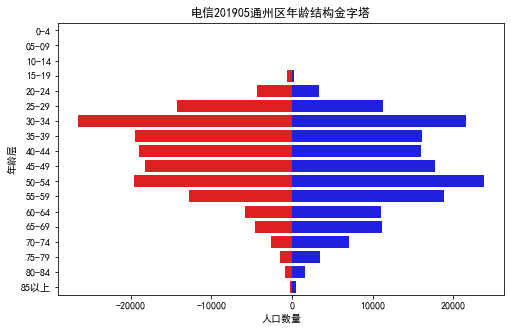

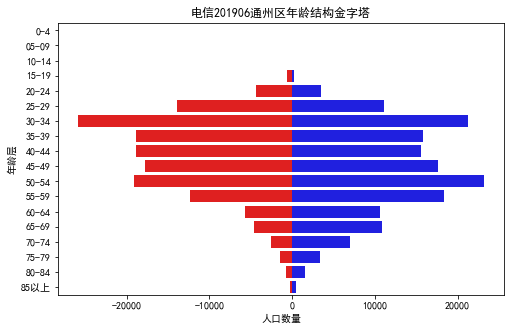

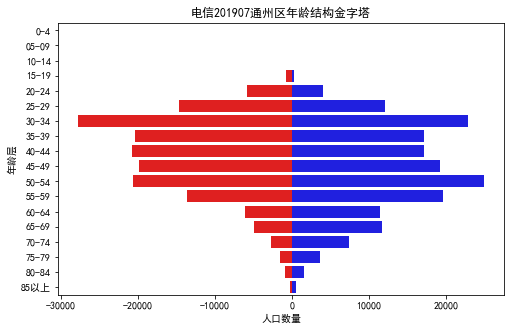

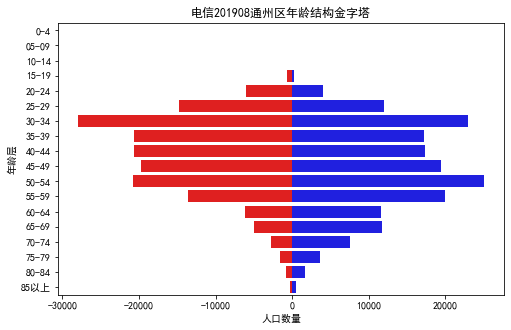

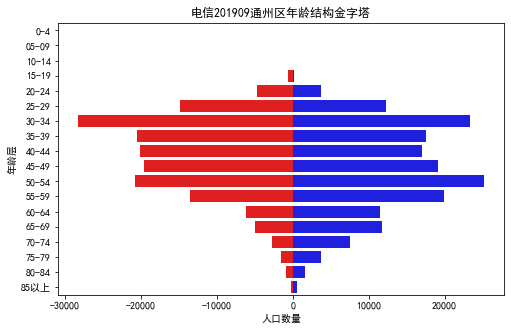

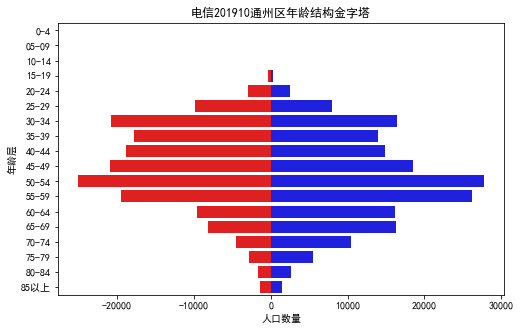

In [5]:
CTounties = list(CT['区县'].unique())
CTmonth = list(CT['月份'].unique())
CTmonth.sort()
for i in CTounties:
    for j in CTmonth:
        a = draw2(CT,i,j,'电信')

Visualizing 移动按年分区百岁图

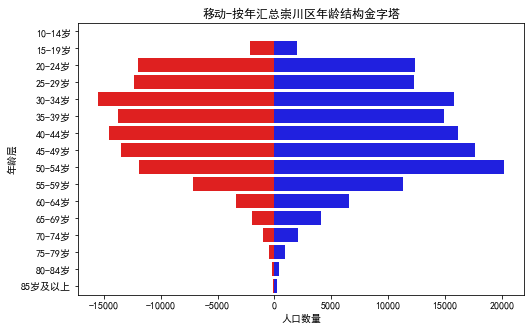

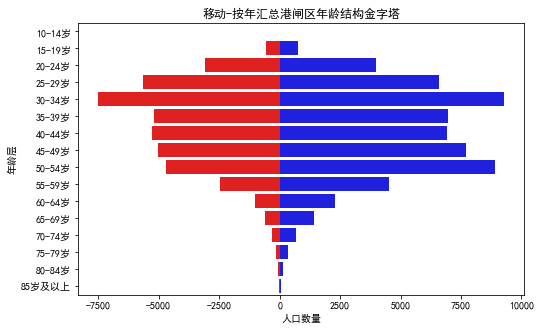

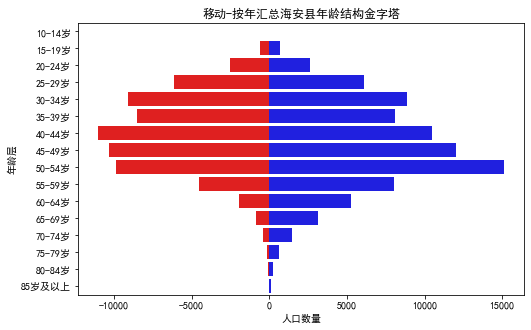

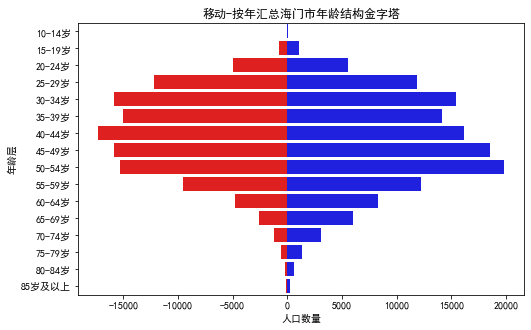

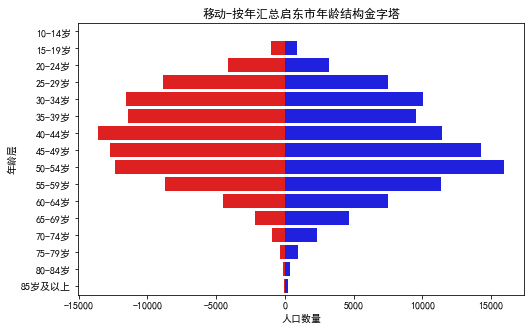

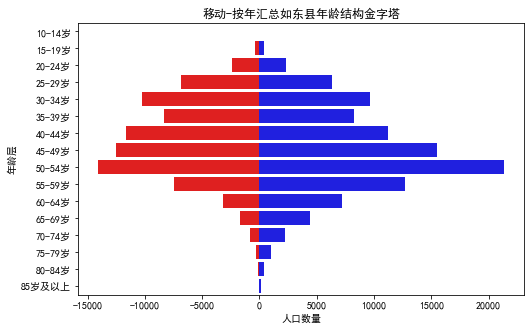

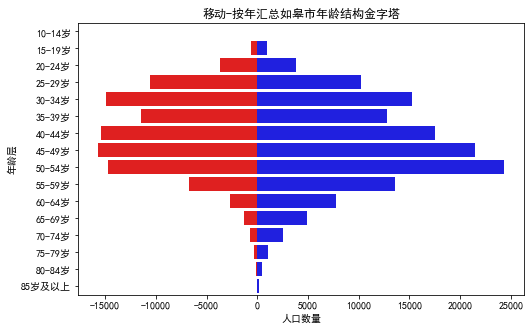

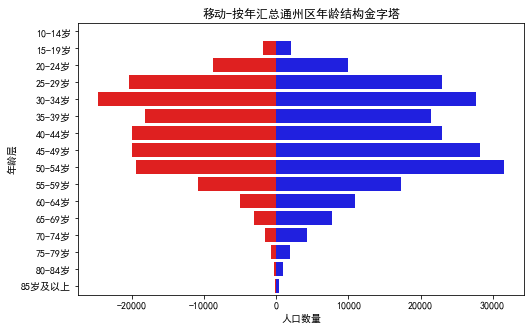

In [10]:
CMYcounties = list(CM_year['区县'].unique())
for i in CMYcounties:
    a = draw(CM_year,i,'移动-按年汇总')

Visualizing 移动分区10月百岁图

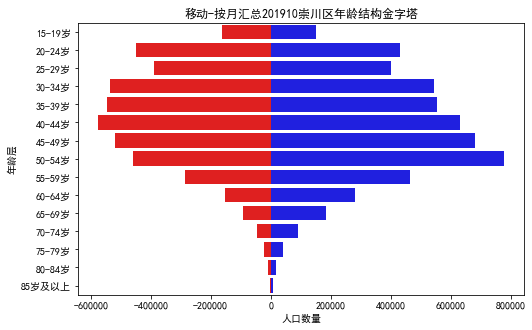

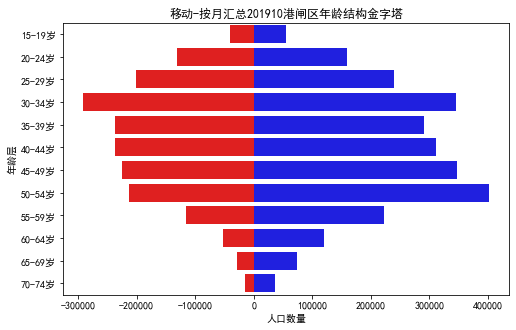

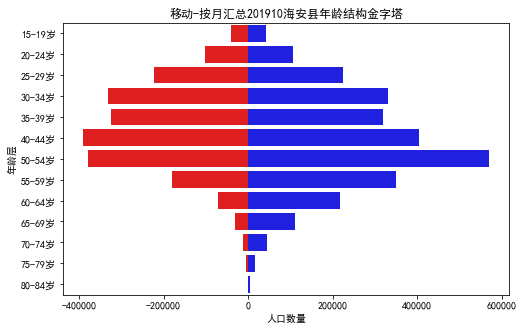

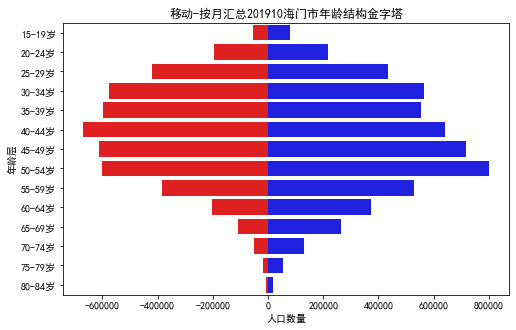

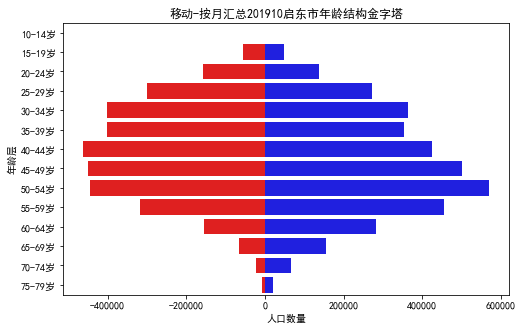

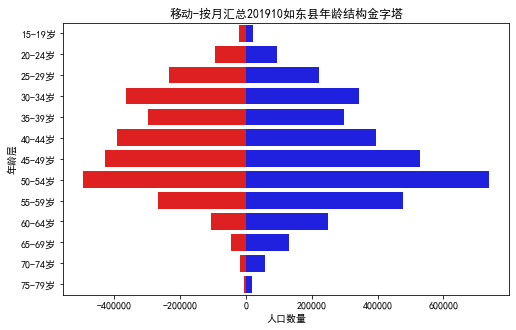

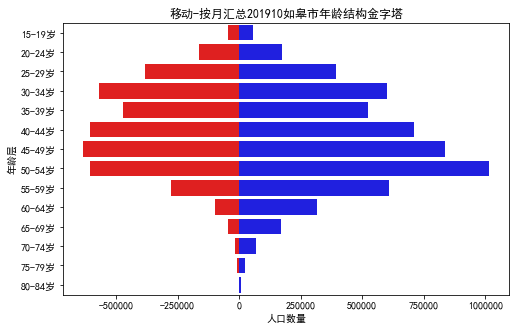

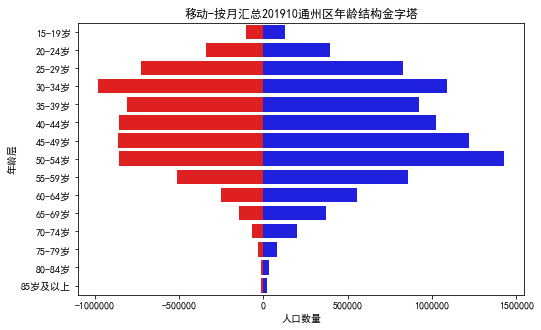

In [8]:


CMounties = list(CM_month['区县'].unique())
CMmonth = list(CM_month['月份'].unique())
CMmonth.sort()
mon = [20181101,20181201,20190101,20190201,20190301,20190401,20190501,20190601,20190701,20190801,20190901,201901001]
for i in CMounties:
    for j in CMmonth:
        if j == 201910:
            a = draw2(CM_month,i,j,'移动-按月汇总')

Visualizing 三大运营商全年百岁图

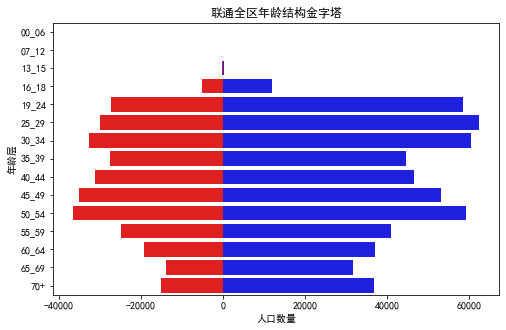

In [12]:
a = drawALL(CU,'联通')

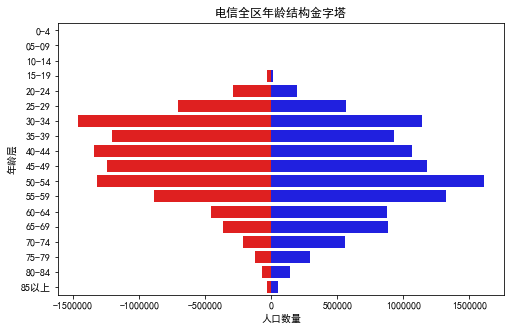

In [13]:
b = drawALL(CT,'电信')

In [14]:
c = drawALL(CM_year,'移动')

KeyError: '月份'